In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [3]:
insurance_df=pd.read_csv('/kaggle/input/insurance/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
val={'male':1,'female':0}
sex=insurance_df.sex.map(val)

In [7]:
val={'yes':1,'no':1}
smoker=insurance_df.smoker.map(val)

In [8]:
import plotly.express as px

In [9]:
fig=px.histogram(insurance_df,x='bmi',y='charges',marginal='box',title='Relationship between BMI and Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig=px.histogram(insurance_df,x='age',y='charges',marginal='box',title='Relation between Age and Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig=px.scatter(insurance_df,x='bmi',y='charges',title='Relationship between BMI and Charges',color='smoker')
fig.update_traces(marker_size=6)
fig.update_layout(scattermode='group')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [12]:
px.violin(insurance_df,x='children',y='charges',title='Correlation of charges')

In [13]:
smoker=insurance_df[insurance_df.smoker=='yes']

In [14]:
medi_df=insurance_df.drop(['sex','region','smoker'],axis=1)

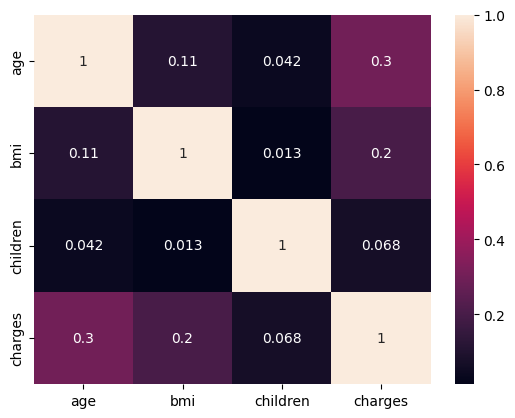

In [15]:
fig=sns.heatmap(medi_df.corr(),annot=True)

In [16]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
medical_df=insurance_df

In [18]:
medical_df['smoker']=medical_df['smoker'].replace({'yes':1,'no':0})
medical_df['sex']=medical_df['sex'].replace({'male':1,'female':0})
medical_df=medical_df.drop(['region'],axis=1)
medical_df

/tmp/ipykernel_32/439470541.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipykernel_32/439470541.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [19]:
X=medical_df.iloc[:,:-1]
y=medical_df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)
X_train.shape,y_train.shape

((1070, 5), (1070,))

In [22]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
model1=LinearRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'The MSE score of the Linear Regression {mse}')
print(f'The RMSE score of the Linear Regression {rmse}')

The MSE score of the Linear Regression 33979257.05080821
The RMSE score of the Linear Regression 5829.17293025419


In [23]:
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
model1=SGDRegressor()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'The MSE score of the Linear Regression {mse}')
print(f'The RMSE score of the Linear Regression {rmse}')

The MSE score of the Linear Regression 2.414848171964705e+21
The RMSE score of the Linear Regression 49141104708.42821
